# Gradient Tree Boosting

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from src.gradboost import GradBoost
import src.utils as utils

In [2]:
df = pd.read_csv("data/diamonds.csv")
X_train, X_test, y_train, y_test = utils.preprocessing_LOS(df)

In [4]:
param_grid = {
	"learning_rate": [0.01, 0.1, 0.5, 1.0],
	"subsample": [0.5, 0.75, 1.0],
	"criterion": ["friedman_mse", "squared_error"],
}

random_search = RandomizedSearchCV(GradBoost(loss="log_loss"), param_grid, cv=5, scoring="accuracy", 
								 return_train_score=True, verbose=10, n_iter=10, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradBoost(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'subsample': [0.5, 0.75, 1.0]},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [5]:
sorted(zip(random_search.cv_results_["mean_test_score"], random_search.cv_results_["params"]), reverse=True, key=lambda x: x[0])

[(0.7750425908193381,
  {'subsample': 1.0, 'learning_rate': 0.5, 'criterion': 'squared_error'}),
 (0.766969674575042,
  {'subsample': 0.75, 'learning_rate': 0.5, 'criterion': 'squared_error'}),
 (0.761950389090996,
  {'subsample': 0.75, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}),
 (0.7609943266539373,
  {'subsample': 0.5, 'learning_rate': 0.1, 'criterion': 'squared_error'}),
 (0.7604367199395976,
  {'subsample': 0.5, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}),
 (0.7539298779419293,
  {'subsample': 0.5, 'learning_rate': 0.5, 'criterion': 'squared_error'}),
 (0.7366165397574607,
  {'subsample': 0.75, 'learning_rate': 1.0, 'criterion': 'friedman_mse'}),
 (0.736297856979609,
  {'subsample': 0.75, 'learning_rate': 1.0, 'criterion': 'squared_error'}),
 (0.7327386297021347,
  {'subsample': 1.0, 'learning_rate': 0.01, 'criterion': 'squared_error'}),
 (0.7092903307151823,
  {'subsample': 0.5, 'learning_rate': 1.0, 'criterion': 'friedman_mse'})]

The best accuracy is given by a `learning_rate` of 0.5, but 0.1 also yield good results with a `subsample` lower than 1, so we believe that the accuracy that a `learning_rate` of 0.1 can achieve with the full training set (`subsample` = 1.0) is higher than of 0.5. To make sure, we will to a randomized search for the `max_depth` trying both 0.5 and 0.1 `learning_rate`s.

In [16]:
param_grid = {
	"max_depth": list(range(3, 14)),
}

random_search = RandomizedSearchCV(GradBoost(learning_rate=0.5, criterion="squared_error"), param_grid, cv=5, scoring="accuracy", 
								   return_train_score=True, verbose=10, n_iter=5, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=GradBoost(criterion='squared_error',
                                       learning_rate=0.5),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13]},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [17]:
sorted(zip(random_search.cv_results_["mean_test_score"], random_search.cv_results_["params"]), reverse=True, key=lambda x: x[0])

[(0.7865374402549123, {'max_depth': 13}),
 (0.786032926181625, {'max_depth': 12}),
 (0.7797397769516727, {'max_depth': 9}),
 (0.7782793414763675, {'max_depth': 8}),
 (0.7464418481147106, {'max_depth': 6})]

In [18]:
model = GradBoost(learning_rate=0.5,
				  n_estimators=100,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=12)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train2, y_train2)
model.compute_metrics(X_val, y_val)

{'accuracy': 0.7955390334572491,
 'precision': 0.798932384341637,
 'recall': 0.7115689381933439,
 'f1': 0.7527242246437552}

In [6]:
param_grid = {
	"max_depth": list(range(4, 20)),
}

random_search = RandomizedSearchCV(GradBoost(learning_rate=0.1, criterion="squared_error"), param_grid, cv=5, scoring="accuracy", 
								   return_train_score=True, verbose=10, n_iter=10, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradBoost(criterion='squared_error'),
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 14, 15, 16, 17,
                                                      18, 19]},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [7]:
sorted(zip(random_search.cv_results_["mean_test_score"], random_search.cv_results_["params"]), reverse=True, key=lambda x: x[0])

[(0.7916356877323419, {'max_depth': 8}),
 (0.7914232607541157, {'max_depth': 9}),
 (0.790971853425385, {'max_depth': 7}),
 (0.7890069038767923, {'max_depth': 12}),
 (0.7874137015400956, {'max_depth': 14}),
 (0.7862719065321296, {'max_depth': 13}),
 (0.7855815188528943, {'max_depth': 17}),
 (0.7843600637280935, {'max_depth': 19}),
 (0.7821030270844398, {'max_depth': 5}),
 (0.7714285714285716, {'max_depth': 4})]

This time the best max_depth is around 8. We will take 7, which its accuracy is very similar and it's less computationally expensive.

In [22]:
model = GradBoost(learning_rate=0.1,
				  n_estimators=100,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=7)
model.fit(X_train2, y_train2)
model.compute_metrics(X_val, y_val)

{'accuracy': 0.8023101433882103,
 'precision': 0.8047016274864376,
 'recall': 0.705229793977813,
 'f1': 0.7516891891891893}

We confirm that `learning_rate` of 0.1 not only achieved a slightly higher accuracy than 0.5, but the `max_depth` is also lower, which means the model is simpler and more efficient.

We also observe that recall is lower than the other metrics, this is probably because the model has a trend higher than it should be to predict the classes with more frequency. Below we show this.

In [25]:
result_df = pd.DataFrame({"y_val": y_val, "y_pred": model.predict(X_val)})
result_counts = result_df.apply(pd.Series.value_counts)
result_counts

,y_val,y_pred
2,3232,3594
3,1897,1931
4,1721,1410
1,631,553
0,51,44


Now we will check if incerasing `n_estimators` increases the metrics.

In [24]:
model0 = GradBoost(learning_rate=0.1,
				  n_estimators=200,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=7)
model0.fit(X_train2, y_train2)
model0.compute_metrics(X_val, y_val)

{'accuracy': 0.8007169410515136,
 'precision': 0.7959927140255009,
 'recall': 0.6925515055467512,
 'f1': 0.7406779661016948}

They were vaguely decreased, but they were not increased, which means that making the model more complex doesn't improve it.

This is the best we could achieve tunning the model's parameters, so now we will test it.

In [20]:
model1 = GradBoost(learning_rate=0.1,
				  n_estimators=100,
				  subsample=1.0,
				  criterion="squared_error",
				  max_depth=7)
model1.fit(X_train, y_train)
model1.compute_metrics(X_test, y_test)

{'accuracy': 0.7951359388275276,
 'precision': 0.8003384094754653,
 'recall': 0.6596931659693166,
 'f1': 0.7232415902140673}

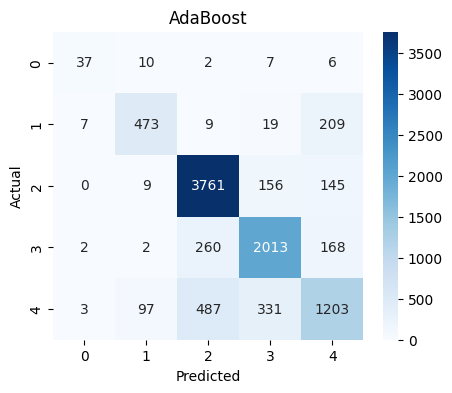

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = model1.conf_matrix(X_test, y_test)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
from src.randomforest import RandomForest
model2 = RandomForest(n_estimators=100, max_depth=16, bootstrap=True, class_weight="balanced")
model2.fit(X_train, y_train)
diff = model1.compare(model2, X_test, y_test)

accuracy 0.010620220900594779
precision 0.04362199156501756
recall -0.04741980474198049
f1 -0.007832670780885898
confusion matrix [[   0   -1   -1    1    1]
 [   2  -34   -1  -10   43]
 [   0   -1  -10  -33   44]
 [   2   -7  -15  -51   71]
 [   3  -36   -8 -154  195]]


What is gained in precision by Gradient Boosting, is lost in recall, compared to Random Forest.

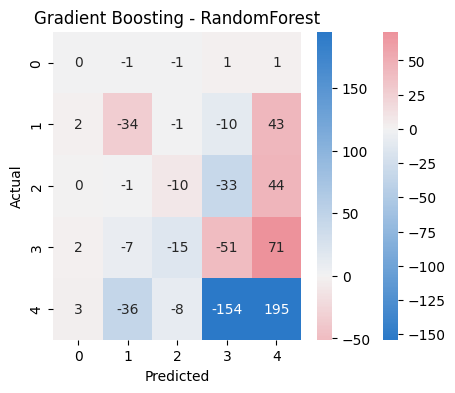

In [29]:
import numpy as np

conf_mat_diff = diff["confusion matrix"]

mask = np.eye(conf_mat_diff.shape[0], dtype=bool)
cmap_diag = sns.diverging_palette(250, 10, s=90, l=50, as_cmap=True)
cmap_offdiag = sns.diverging_palette(10, 250, s=90, l=50, as_cmap=True)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_diff, mask=mask, annot=True, fmt="d", cmap=cmap_diag, center=0)
sns.heatmap(conf_mat_diff, mask=~mask, annot=True, fmt="d", cmap=cmap_offdiag, center=0)
plt.title("Gradient Boosting - RandomForest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Comparing the Gradient Boosting model with the Random Forest, we observe that, similar to AdaBoost, Gradient Boosting predicts class 4 more often that it should, gaining precision on it but loosing it with other classes. However, this model is less complex in terms of `max_depth` (7 vs 16), but still, Random Forest seems to generalize better to the overall distribution of classes.